# DS-NYC-45 | Unit Project 4: Notebook with Executive Summary

In this project, you will summarize and present your analysis from Unit Projects 1-3.

> ## Question 1.  Introduction
> Write a problem statement for this project.

The goal is to determine the likelihood of an applicant being admitted to graduate school at UCLA, using the applicant's GRE score, GPA, and the prestige of the applicant's undergraduate institution. 

Hypothesis: An applicant's GRE score, GPA, and the prestige of the applicant's undergraduate institution are all positively correlated with admission to graduate school at UCLA.

> ## Question 2.  Dataset
> Write up a description of your data and any cleaning that was completed.

The data, which comes from UCLA's Logit Regression in R tutorial, consists of

* GRE scores
* GPAs
* UCLA's ranking of the prestige of the applicant's undergraduate institution on a scale of 1 to 4, with 1 for the most prestigious instituions, and 4 for the least prestigious institutions. (It's not clear to me how UCLA determined these rankings, and for purposes of this problem, I am assuming that UCLA got it right.)

This data is provided for 400 applicants to graduate school at UCLA. This represents slightly less than 2% of UCLA's annual graduate student applicant pool.

Some minor cleaning was required. Three rows were missing GRE scores, GPAs, and/or prestige values. These three rows were removed from the dataset.

Furthermore, the prestige ranking for each applicant was converted into dummy variables, using one-hot encoding.

> ## Question 3.  Demo
> Provide a table that explains the data by admission status.

Answer:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data = pd.read_csv("/Users/stevenwang/DAT-NYC-45/unit-project/dataset/ucla-admissions.csv")
ucla = data[data["gpa"].apply(np.isnan) == False]
ucla = ucla[ucla["gre"].apply(np.isnan) == False]
ucla = ucla[ucla["prestige"].apply(np.isnan) == False]
admit = ucla[ucla["admit"]==1]
nonadmit = ucla[ucla["admit"] == 0]

In [4]:
print("Data Summary for Admitted Applicants")
admit.describe()

Data Summary for Admitted Applicants


,admit,gre,gpa,prestige
count,126.0,126.000000,126.000000,126.000000
mean,1.0,618.571429,3.489206,2.150794
std,0.0,109.257233,0.371655,0.921455
min,1.0,300.000000,2.420000,1.000000
25%,1.0,540.000000,3.220000,1.000000
50%,1.0,620.000000,3.545000,2.000000
75%,1.0,680.000000,3.757500,3.000000
max,1.0,800.000000,4.000000,4.000000


In [5]:
print("Data Summary for Applicants Who Were Not Admitted")
nonadmit.describe()

Data Summary for Applicants Who Were Not Admitted


,admit,gre,gpa,prestige
count,271.0,271.000000,271.000000,271.000000
mean,0.0,573.579336,3.347159,2.645756
std,0.0,116.052798,0.376355,0.918922
min,0.0,220.000000,2.260000,1.000000
25%,0.0,500.000000,3.080000,2.000000
50%,0.0,580.000000,3.340000,3.000000
75%,0.0,660.000000,3.610000,3.000000
max,0.0,800.000000,4.000000,4.000000


> ## Question 4. Methods
> Write up the methods used in your analysis.

First, I calculated the odds of being admitted to UCLA if one attended a prestigious school;  the odds of being admitted if one did not attend a prestigious school; and the odds ratio.

The "prestige" variable was converted into dummy variables using one-hot encoding. I fitted the data to logistic regression models, using statsmodels first and then sklearn. In both models, prestige Tier 1 (i.e., the most prestigious schools) was used as a reference point.

Both models were similar. The most notable difference was that statsmodels gave greater weight to an applicant's GPA. Holding the other variables constant, statsmodels predicted that the odds of being admitted rose by 118% with a one-point increase in GPA, while sklearn predicted that the odds of being admitted rose by 96% with a one-point increase in GPA.

> ## Question 5. Results
> Write up your results.

### Prestige Matters

The prestige of an applicant's undergraduate school significantly affects the probability of admission to graduate school at UCLA. When GRE scores and GPAs are held constant, an applicant from one of the most prestigious schools is more likely to be admitted than an applicant from one of the least prestigious schools. 

Consider, for example, two applicants--one who attended the one of the most prestigious schools, and the other who attended one of the least prestigious schools. Furthermore, in this example, we assume that both applicants scored 800 on the GRE (a perfect score) and have GPAs of 4.0. 

The probability that an applicant with a perfect GRE score and GPA will be admitted is over 70% (71% under sklearn's model, 73% under statsmodels' model), if he or she attended one of the most prestigious schools. In contrast, the probability that an applicant with an identical GRE score and GPA will be admitted is roughly cut in half (34% under sklearn's model, 37% under statsmodels' model) if he or she attended one of the least prestigious schools.

Although two candidates may have identical GRE scores and GPAs--even perfect GRE scores and GPAs--UCLA powerfully favors those who attended more prestigious schools.

> ## Question 6. Visuals
> Provide a table or visualization of these results.

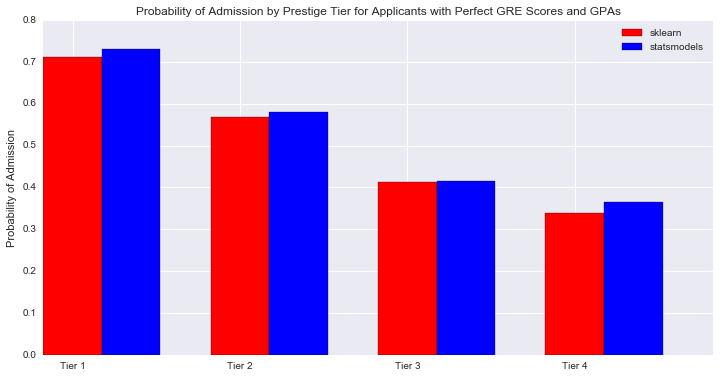

In [2]:
N = 4
index = ["Tier 1", "Tier 2", "Tier 3", "Tier 4"]
prob_sk = [.7119, .5685, .4139, .3398]
prob_sm = [.7311, .5794, .4162, .3651]

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize = (12,6))
rects1 = ax.bar(ind, prob_sk, width, color='r')
rects2 = ax.bar(ind + width, prob_sm, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Probability of Admission')
ax.set_title('Probability of Admission by Prestige Tier for Applicants with Perfect GRE Scores and GPAs')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(index)

ax.legend((rects1[0], rects2[0]), ('sklearn', 'statsmodels'))

## Even for applicants with perfect GRE scores and GPA, the probability of admission increases significantly if an applicant attended a prestigious school.

> ## Question 7.  Discussion
> Write up your discussion and future steps.

UCLA favors applicants from prestigious schools, even controlling for GRE scores and GPAs. This may mean that qualified applicants from less prestigious schools are turned away. One solution is to redact information about an applicant's alma mater when his or her application is being considered.

Furthermore, the analysis does not explain **why** UCLA favors applicants from prestigious schools. One possible, if cynical, answer is that UCLA's admissions team is snobby, more impressed by an applicant's alma mater than his or her GRE scores and GPA. But it could also be the case that prestigious schools enable their graduates to stand out in ways that are not captured by the dataset. From example, perhaps prestigious schools enable their students to pursue research opportunities that are not available at less prestigious schools, resulting in stronger applications when their alumni apply to graduate school. Something like this would not show up in the dataset, but could influence UCLA's admissions decisions. Further research would be required to test such hypotheses.